In [1]:
import urllib.request
from os.path import join, dirname
import dotenv
import json
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def get_data_web():
    response = urllib.request.urlopen('https://api.um.warszawa.pl/api/action/dbstore_get/?id=daeea0db-0f9a-498d-9c4f-210897daffd2&apikey=13eaed3c-3b11-4ab2-8ada-9ec71327b95c')
    html     = response.read().decode('utf-8') # http://stackoverflow.com/questions/23049767/parsing-http-response-in-python
    data_web = json.loads(html) # https://www.reddit.com/r/learnpython/comments/3nx9ch/json_load_vs_loads/
    return data_web

In [130]:
data_web['result'][:3]

[{'values': [{'key': 'tabor', 'value': 'T'},
   {'key': 'linia', 'value': '31'},
   {'key': 'gps_szer', 'value': '52.186324'},
   {'key': 'gps_dlug', 'value': '21.000980'},
   {'key': 'ostatnia_aktualizacja', 'value': '2016-04-22 18:47:09.0'}]},
 {'values': [{'key': 'tabor', 'value': 'T'},
   {'key': 'linia', 'value': '6'},
   {'key': 'gps_szer', 'value': '52.258123'},
   {'key': 'gps_dlug', 'value': '20.996132'},
   {'key': 'ostatnia_aktualizacja', 'value': '2016-04-22 19:49:53.0'}]},
 {'values': [{'key': 'tabor', 'value': 'T'},
   {'key': 'linia', 'value': '31'},
   {'key': 'gps_szer', 'value': '52.180882'},
   {'key': 'gps_dlug', 'value': '21.021646'},
   {'key': 'ostatnia_aktualizacja', 'value': '2016-04-22 19:50:39.0'}]}]

In [3]:
def get_data_vehicles(data_web):
    def get_vehicle(item):
        return dict( [(item_values['key'],item_values['value']) for item_values in item['values']] )
    return [get_vehicle(item) for item in data_web['result']]

In [137]:
data_web = get_data_web() 
data_veh = get_data_vehicles(data_web)
data_veh

[{'gps_dlug': '21.000980',
  'gps_szer': '52.186324',
  'linia': '31',
  'ostatnia_aktualizacja': '2016-04-22 18:47:09.0',
  'tabor': 'T'},
 {'gps_dlug': '20.990314',
  'gps_szer': '52.264856',
  'linia': '6',
  'ostatnia_aktualizacja': '2016-04-22 19:52:34.0',
  'tabor': 'T'},
 {'gps_dlug': '21.023138',
  'gps_szer': '52.182348',
  'linia': '31',
  'ostatnia_aktualizacja': '2016-04-22 19:52:44.0',
  'tabor': 'T'},
 {'gps_dlug': '21.000600',
  'gps_szer': '52.185847',
  'linia': '31',
  'ostatnia_aktualizacja': '2016-04-22 19:52:45.0',
  'tabor': 'T'},
 {'gps_dlug': '21.001039',
  'gps_szer': '52.187879',
  'linia': '31',
  'ostatnia_aktualizacja': '2016-04-22 19:23:42.0',
  'tabor': 'T'},
 {'gps_dlug': '21.000965',
  'gps_szer': '52.188203',
  'linia': '31',
  'ostatnia_aktualizacja': '2016-04-22 19:45:22.0',
  'tabor': 'T'},
 {'gps_dlug': '21.001229',
  'gps_szer': '52.188491',
  'linia': '31',
  'ostatnia_aktualizacja': '2016-04-22 19:13:13.0',
  'tabor': 'T'},
 {'gps_dlug': '21.001

In [138]:
call="Chrupo!"
print(call)

Chrupo!


In [143]:
## Poblem with data - they are strings not floats
## http://stackoverflow.com/questions/5316720/python-how-to-convert-a-list-of-dictionaries-values-into-int-float-from-string
## or dump to json and then pandas.read_json
data_bad = pd.DataFrame(data_veh)
data_bad.iloc[4,1]

'52.187879'

In [147]:
## Now the data has floats not strings
data_veh_json = json.dumps(data_veh)
data_good = pd.read_json(data_veh_json)
data_good.iloc[4,1]

52.187879000000002

In [4]:
## Generate data in pandas from vehicle data dumped to json - from web directly or from file
def current_data(filename = None):
    if filename == None:
        data_web = get_data_web()
        data_veh = get_data_vehicles(data_web)
        data_veh_json = json.dumps(data_veh)
        data = pd.read_json(data_veh_json)
    elif filename is not None:
        data = pd.read_json(filename)
    return data

In [5]:
data = current_data('warsaw-tramps_2016-15-17--17-15-59') # data = current_data()

In [6]:
data.shape

(245, 5)

In [8]:
data.size

1225

In [9]:
data.columns

Index(['gps_dlug', 'gps_szer', 'linia', 'ostatnia_aktualizacja', 'tabor'], dtype='object')

In [390]:
data
data['linia'].to_csv('data.csv',mode='w')

In [10]:
data.iloc[0:5, (1,2)] #http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.iloc.htm3

,gps_szer,linia
0,52.270375,28
1,52.186171,0
2,52.271803,27
3,52.299664,0
4,52.247490,28


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000007C5C6A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000007CBBEF0>]], dtype=object)

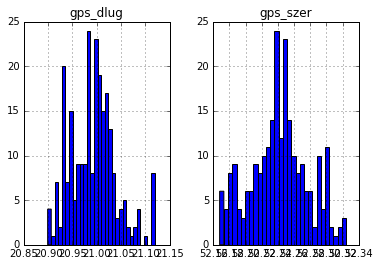

In [11]:
%matplotlib inline
data[['gps_dlug', 'gps_szer']].hist(bins=30) # Dokładność gps'u?

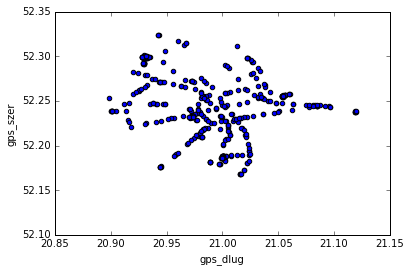

In [161]:
data.plot.scatter('gps_dlug', 'gps_szer')

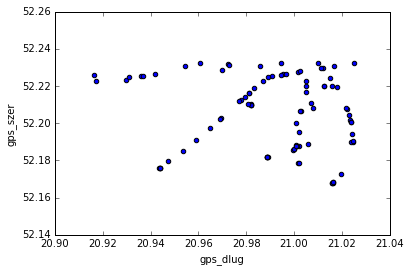

In [12]:
gps_dlug_south = data[data['gps_szer'] < 52.2330653]
gps_dlug_south.plot.scatter('gps_dlug', 'gps_szer')

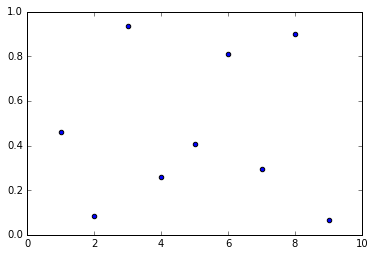

In [82]:
plt.axis([0, 10, 0, 1])
plt.ion()

for i in range(1,10):
    y = np.random.random()
    plt.scatter(i,y)
    plt.pause(.5)

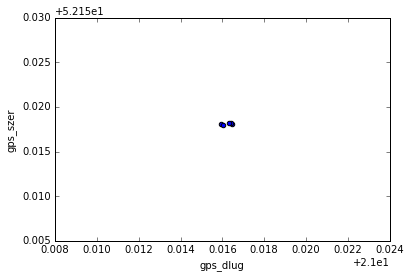

AttributeError: 'AxesSubplot' object has no attribute 'close'

In [51]:
plt.ion()

for i in range(1,10):
    step = (52.35 - 52.15)/i
    data_to_plot = data[data['gps_szer'] <= (52.15 + 2*i/100)]
#     data_to_plot.plot.scatter('gps_dlug', 'gps_szer')
    try:
        fig=data_to_plot.plot.scatter('gps_dlug', 'gps_szer')
    except TypeError:
        pass
    plt.show(fig)
    plt.pause(1)

In [411]:
bin_vector = np.linspace(0,83,84)
bin_vector.astype(int)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

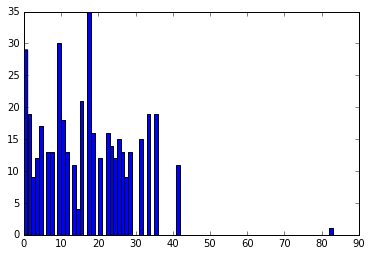

In [419]:
## Number of vehicles for with a given line number
# data['linia'].hist(bins = max(data['linia']))
(n, bins, patches) = plt.hist(data['linia'], bins = bin_vector)

In [420]:
linie_data_series = pd.Series((bins.astype(int), n.astype(int)), index = ['linia', 'pojazdy'])
print(linie_data_series['linia'])
print(linie_data_series['pojazdy'])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83]
[29 19  9 12 17  0 13 13  0 30 18 13  0 11  4 21  0 35 16  0 12  0 16 14 12
 15 13  9 13  0  0 15  0 19  0 19  0  0  0  0  0 11  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1]


In [432]:
def veh_mean(cutoff = '83'): # max(data[]'linia'])
    for i in range(0, cutoff):
        c = data['linia'].count(i)
        print(c)
        
# http://stackoverflow.com/questions/2600191/how-can-i-count-the-occurrences-of-a-list-item-in-python
    
#     pojazdy_all_mean = int(linie_data_series['pojazdy'].sum()/len(linie_data_series['pojazdy']))
# pojazdy_all_mean
veh_mean(5)

AttributeError: 'RangeIndex' object has no attribute 'levels'

In [367]:
a=[linie_data_series['linia'] <= cutoff]
b=linie_data_series['linia'][[linie_data_series['linia'] <= cutoff]]
b


print(len(a[0]))
print(len(linie_data_series['linia']))
# length = len(linie_data_series['pojazdy'][linie_data_series['linia'] <= cutoff])
# pojazdy_part_mean = linie_data_series['pojazdy'][linie_data_series['linia'] <= cutoff].sum()/

84
84


In [ ]:
# for i in range(1,4):
#     data = actual_data()
#     data.plot.scatter('gps_dlug', 'gps_szer')
#     time.sleep(3)